# Data Guild 30 March 2021

Today we will be doing 2 basic technical trade ideas for ASX200.

The S&P/ASX 200 index tracks the largest 200 of the listed companies on the Australian Stock Exchange (ASX) and is used as a reference point to measure the combined performance of their shares.

This code is taken mostly from the python for finance blog below.

https://pythonforfinance.net/

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data

In [2]:
asx200 = data.DataReader('^AXJO', 'yahoo',start='1/1/2000')

In [3]:
asx200.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,3093.699951,3093.699951,3093.699951,3093.699951,0.0,3093.699951
2000-01-04,3018.699951,3018.699951,3018.699951,3018.699951,0.0,3018.699951
2000-01-05,2999.300049,2999.300049,2999.300049,2999.300049,0.0,2999.300049
2000-01-06,3023.399902,3023.399902,3023.399902,3023.399902,0.0,3023.399902
2000-01-09,3084.000000,3084.000000,3084.000000,3084.000000,0.0,3084.000000


<AxesSubplot:title={'center':'ASX200 since 2000'}, xlabel='Date'>

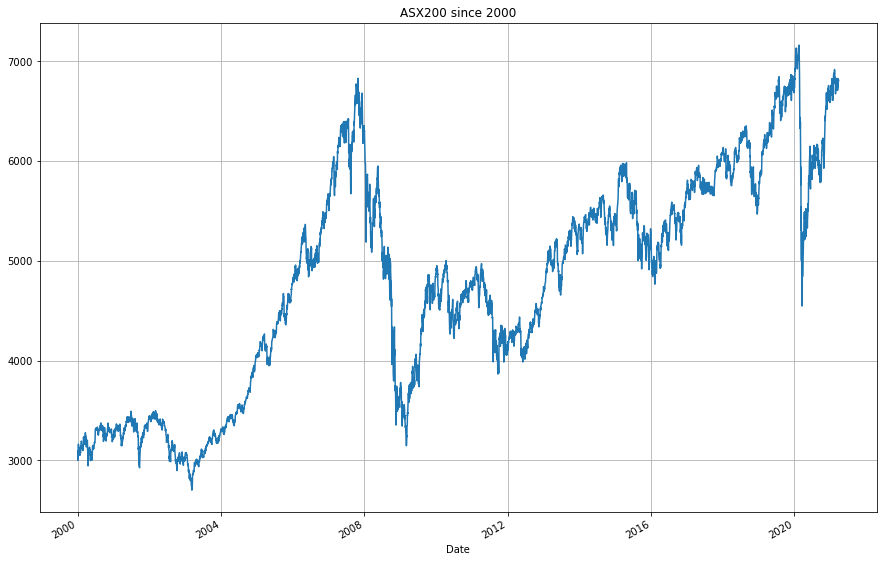

In [4]:
asx200['Close'].plot(grid=True,figsize=(15,10),title='ASX200 since 2000')

In [5]:
small = 42
big = 252

asx200['small'] = np.round(asx200['Close'].rolling(window=small).mean(),2)
asx200['big'] = np.round(asx200['Close'].rolling(window=big).mean(),2)

<AxesSubplot:title={'center':'ASX200 with SMAs'}, xlabel='Date'>

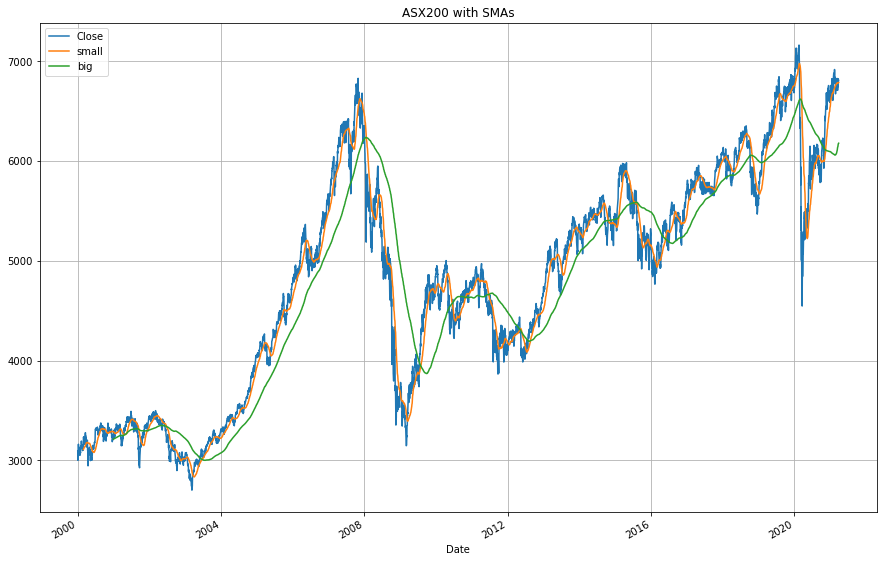

In [6]:
asx200[['Close','small','big']].plot(grid=True,figsize=(15,10),title='ASX200 with SMAs')

In [7]:
asx200['small-big'] = asx200['small'] - asx200['big']

In [8]:
X = 50
asx200['Position'] = np.where(asx200['small-big'] > X, 1, 0)
asx200['Position'] = np.where(asx200['small-big'] < -X, -1, asx200['Position'])
asx200['Position'].value_counts()

 1    3179
-1    1409
 0     778
Name: Position, dtype: int64

<AxesSubplot:title={'center':'Position'}, xlabel='Date'>

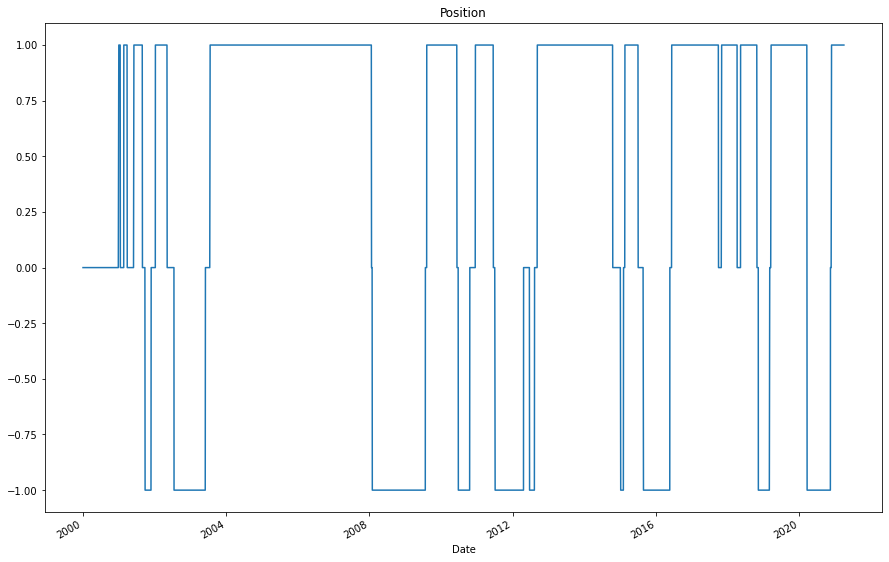

In [9]:
asx200['Position'].plot(lw=1.5,ylim=[-1.1,1.1],figsize=(15,10),title='Position')

In [10]:
asx200['Market Returns'] = np.log(asx200['Close'] / asx200['Close'].shift(1))
asx200['Strategy'] = asx200['Market Returns'] * asx200['Position'].shift(1)
asx200.tail()

,High,Low,Open,Close,Volume,Adj Close,small,big,small-big,Position,Market Returns,Strategy
Date,,,,,,,,,,,,
2021-03-22,6786.200195,6741.299805,6757.799805,6745.399902,518800.0,6745.399902,6782.98,6150.52,632.46,1,-0.001052,-0.001052
2021-03-23,6799.100098,6735.600098,6741.799805,6778.799805,503000.0,6778.799805,6782.47,6157.13,625.34,1,0.004939,0.004939
2021-03-24,6806.000000,6769.899902,6772.799805,6790.600098,557700.0,6790.600098,6781.65,6164.86,616.79,1,0.001739,0.001739
2021-03-25,6835.000000,6790.600098,6790.600098,6824.200195,571500.0,6824.200195,6782.69,6171.38,611.31,1,0.004936,0.004936
2021-03-29,6860.600098,6800.899902,6824.200195,6805.200195,0.0,6805.200195,6786.40,6178.24,608.16,1,-0.002788,-0.002788


<AxesSubplot:xlabel='Date'>

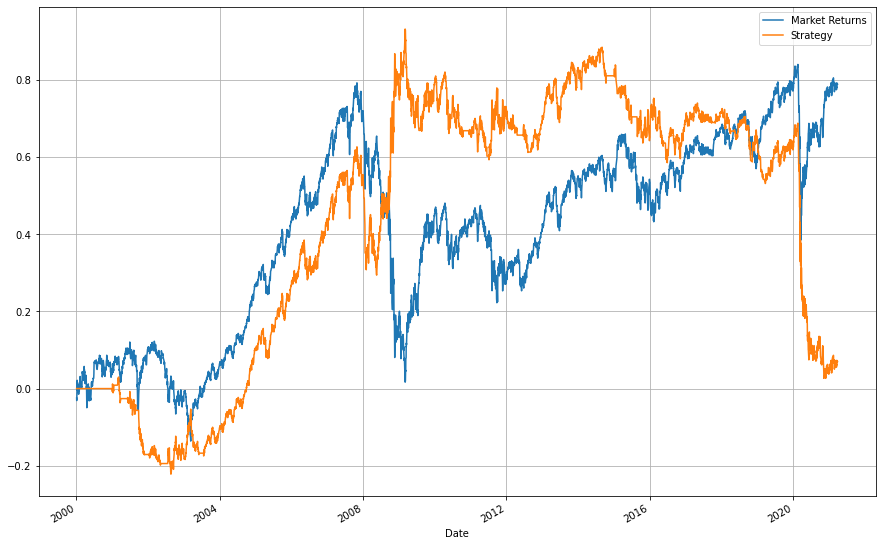

In [11]:
asx200[['Market Returns','Strategy']].cumsum().plot(grid=True,figsize=(15,10))

# apparently we should just be long the underlying...

Now we will look at one more strategy called Bollinger bands

In [12]:
#make the necessary imports
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(data.DataReader('^AXJO', 'yahoo',start='1/1/2015'))
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,5436.299805,5387.000000,5411.000000,5435.899902,0.0,5435.899902
2015-01-04,5470.399902,5429.600098,5435.899902,5450.299805,0.0,5450.299805
2015-01-05,5450.299805,5338.600098,5450.299805,5364.799805,0.0,5364.799805
2015-01-06,5369.799805,5318.700195,5364.799805,5353.600098,0.0,5353.600098
2015-01-07,5395.799805,5353.600098,5353.600098,5381.500000,0.0,5381.500000


In [13]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2

#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()

#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

<AxesSubplot:title={'center':'Bollinger Band Strategy'}, xlabel='Date'>

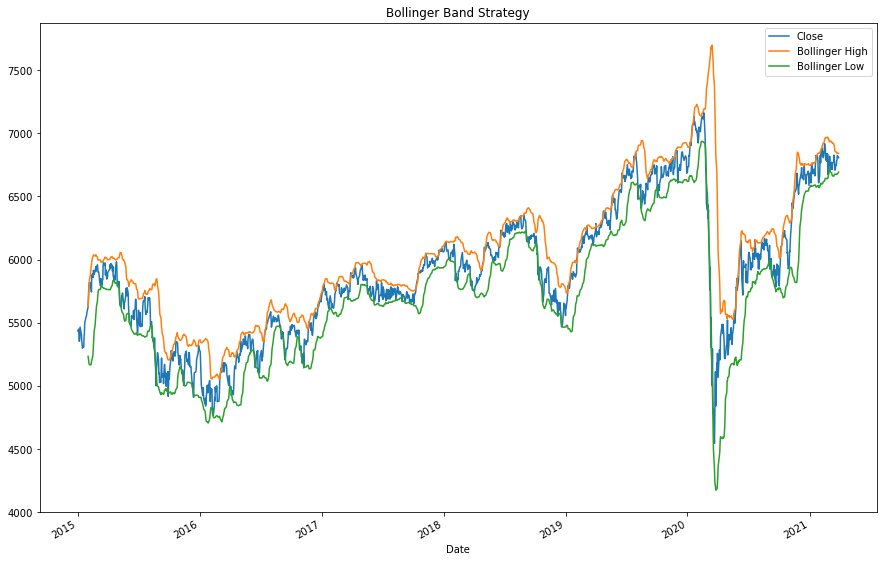

In [14]:
df[['Close','Bollinger High','Bollinger Low']].plot(figsize=(15,10),title='Bollinger Band Strategy')

/home/niki/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:title={'center':'Bollinger Band Strategy Returns'}, xlabel='Date'>

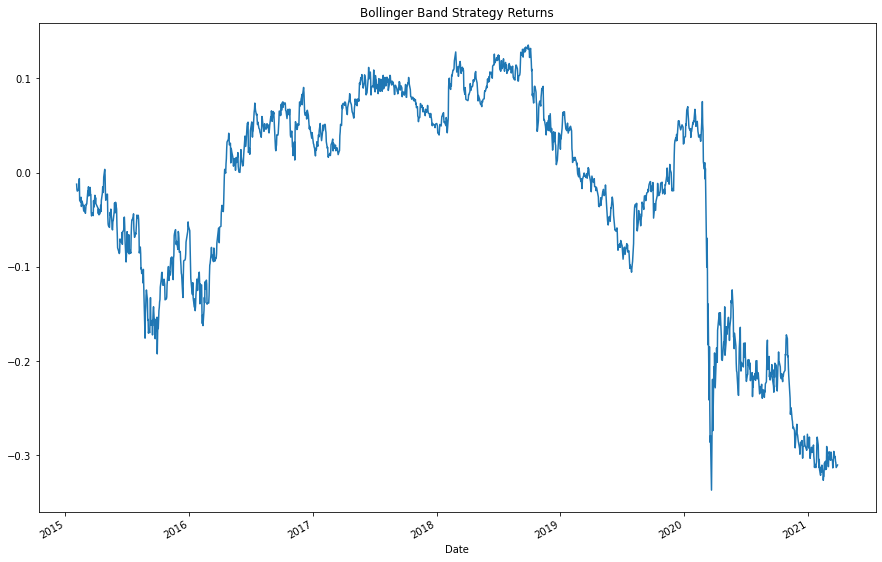

In [15]:
#Create an "empty" column as placeholder for our /position signals
df['Position'] = None

#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(df)):
    
    if (df['Close'].iloc[row] > df['Bollinger High'].iloc[row]) and (df['Close'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
        df['Position'].iloc[row] = -1
        
    if (df['Close'].iloc[row] < df['Bollinger Low'].iloc[row]) and (df['Close'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
        df['Position'].iloc[row] = 1  

#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['Position'].fillna(method='ffill',inplace=True)

#Calculate the daily market return and multiply that by the position to determine strategy returns
df['Market Return'] = np.log(df['Close'] / df['Close'].shift(1))
df['Strategy Return'] = df['Market Return'] * df['Position'].shift(1)

#Plot the strategy returns
df['Strategy Return'].cumsum().plot(figsize=(15,10),title='Bollinger Band Strategy Returns')